## Observations and Insights 
The study provided an abundance of information. There was a plethera of data collected during the analysis. One observation made from the different drug regimens was that Capomulin with a Tumor volume mean of 40.67 and Ramicane	with a Tumor volume mean of 40.21 were considerably lower than the other regimens. The average mean of those other regimens ranged between 52 to 55. The median, variance, standard deviation and SEM were also closely related for those drug regimens as well. 

There was also a equal representation between male and female subjects at 51% and 49% respectively. Nine hundred fifty-eight male mice and nine hundred twenty-two female mice. 

The four most promising treatment regimens were Capomulin, Ramicane, Infubinol, and Ceftamin. Analysis of the final tumor volume for mice treated with these indicated that Infubinol had one outlier. ACapomulin results showed the regimen to be effective. The other regimens used were Ketapril, Naftisol, Placebo, Propriva, Stelasyn and Zoniferol.	

From the line plot, the tumor volume for the focus mouse decreased according to the timepoint data including a significant 14 point decrease between day 15 and 45. A final observation for the Capomulin subjects revealed that as mouse weight increased so did Tumor Volume. The correlation between both factors is 0.84

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
mouse_metadata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
combined_mouse_study = pd.merge(mouse_metadata, study_results) #on="Mouse ID")
#combined_mouse_study = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

In [5]:
# Display the data table for preview
combined_mouse_study.head(-1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [6]:
# Checking the number of mice.
combined_mouse_study['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
combined_mouse_study.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicate = combined_mouse_study.set_index("Mouse ID","Timepoint")
mouse_duplicate.loc["g989"]


C:\Users\jfraz\AppData\Local\Temp/ipykernel_49120/3577285989.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  mouse_duplicate = combined_mouse_study.set_index("Mouse ID","Timepoint")


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID.                   

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.new_mouse_duplicate = new_
new_mouse_duplicate_total = mouse_duplicate.drop(["g989"])
new_mouse_duplicate_total

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [11]:
# Checking the number of mice in the clean DataFrame.
#new_mouse_duplicate_total
new_mouse_duplicate_total.reset_index()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
new_mouse_clean = new_mouse_duplicate_total.reset_index()
# Checking the number of mice in the clean DataFrame.
new_mouse_clean['Mouse ID'].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [13]:
new_mouse_duplicate_total.groupby(["Drug Regimen","Tumor Volume (mm3)"]).head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mouse_tumor_mean = new_mouse_duplicate_total.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mouse_tumor_median = new_mouse_duplicate_total.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
mouse_tumor_variance = new_mouse_duplicate_total.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
mouse_tumor_standard_deviation = new_mouse_duplicate_total.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
mouse_tumor_sem = new_mouse_duplicate_total.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
mouse_tumor_summary = pd.DataFrame({
                        "Mean": mouse_tumor_mean,
                        "Median" : mouse_tumor_median,
                        "Variance" : mouse_tumor_variance,
                        "Standard Deviation" : mouse_tumor_standard_deviation,
                        "SEM" : mouse_tumor_sem
                        })
mouse_tumor_summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_aggregation = new_mouse_duplicate_total.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std", "sem"]})
summary_statistics_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

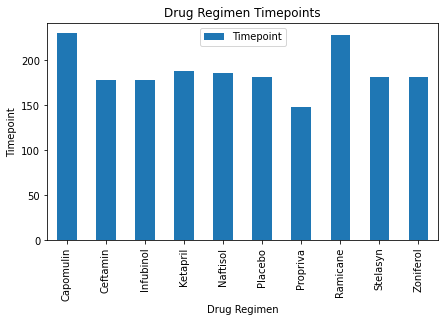

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_regimen = (new_mouse_duplicate_total.groupby(["Drug Regimen"]).count()).reset_index()
mouse_regimen = mouse_regimen[["Drug Regimen", "Timepoint"]]
mouse_regimen = mouse_regimen.set_index("Drug Regimen")

figure1 = mouse_regimen.plot(kind="bar", figsize=(7,4),
                                title ="Drug Regimen Timepoints",
                                xlabel="Drug Regimen",
                                ylabel="Timepoint")
plt.show()

In [17]:
mouse_regimen

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


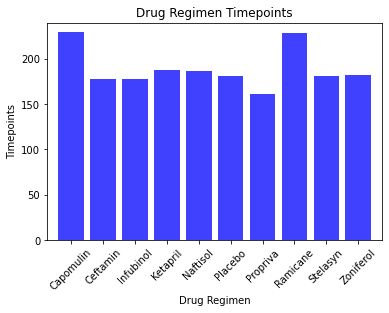

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
                   
timepoints = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

x_axis = np.arange(len(mouse_regimen))
plt.bar(x_axis, timepoints, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin","Ceftamin","Infubinol","Ketapril",
                            "Naftisol","Placebo","Propriva","Ramicane",
                            "Stelasyn","Zoniferol"], rotation ="45")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(timepoints)+10)

plt.title("Drug Regimen Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")                   
                   
plt.show()

In [19]:
new_mouse_duplicate_total["Sex"].value_counts()


Male      958
Female    922
Name: Sex, dtype: int64

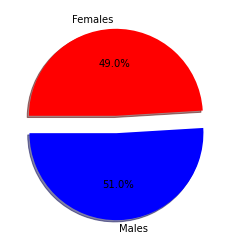

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = ["Males", "Females"]

# The values of each section of the pie chart
totals = [958, 922]

# The colors of each section of the pie chart
colors = ["blue", "red"]

# Tells matplotlib to separate the "Mice" section from the others
explode = (0.2, 0)
plt.pie(totals, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.show()

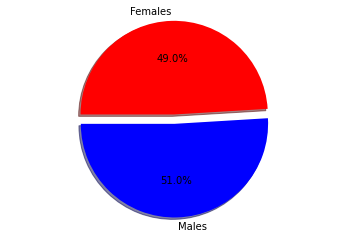

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice = ["Males", "Females"]
gender_totals = [958,922]
colors = ["blue","red"]
explode = (0.1,0)
plt.pie(gender_totals, explode=explode, labels=mice, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180,)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
#plt.savefig("../Images/PyPies.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor = new_mouse_clean.groupby(['Mouse ID'])['Timepoint'].max()
greatest_tumor = pd.DataFrame(final_tumor) 

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tumor = pd.merge(new_mouse_clean, greatest_tumor, on=('Mouse ID','Timepoint'), how='right')
last_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_plot_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = last_tumor.loc[last_tumor["Drug Regimen"]== drug,"Tumor Volume (mm3)"]
    # add subset 
    tumor_volume_plot_data.append(final_volume)
    # Determine outliers using upper and lower bounds      
    quartiles = final_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of final_volume is: {lowerq}")
    print(f"The upper quartile of final_volume is: {upperq}")
    print(f"The interquartile range of final_volume is: {iqr}")
    print(f"The the median of final_volume is: {quartiles[0.5]} ")
        
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)   
    
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    outliers = final_volume.loc[(final_volume < lower_bound) | (final_volume > upper_bound)]
    
    print(f"Outliers for {drug}:{outliers}")
   

The lower quartile of final_volume is: 32.37735684
The upper quartile of final_volume is: 40.1592203
The interquartile range of final_volume is: 7.781863460000004
The the median of final_volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Outliers for Capomulin:Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile of final_volume is: 31.56046955
The upper quartile of final_volume is: 40.65900627
The interquartile range of final_volume is: 9.098536719999998
The the median of final_volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Outliers for Ramicane:Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile of final_volume is: 54.04860769
The upper quartile of final_volume is: 65.52574285
The interquartile range of final_volume is: 11.477135160000003
The the median of final_volume is: 60.16518046 
Values below 36.832904949

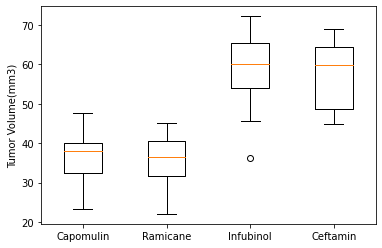

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume_plot_data,labels = treatments)
plt.ylabel("Tumor Volume(mm3)")
plt.show()

## Line and Scatter Plots

In [25]:
Capomulin_mouse = new_mouse_clean.loc[new_mouse_clean["Drug Regimen"] == "Capomulin"]
Capomulin_mouse.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


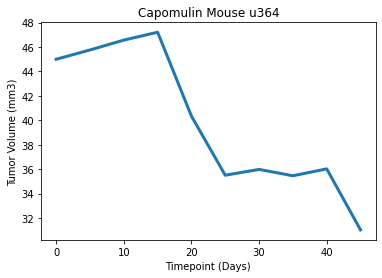

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_mouse_line = new_mouse_clean.loc[new_mouse_clean["Mouse ID"] == "u364",:]
capomulin_mouse_line

x_axis = capomulin_mouse_line["Timepoint"] 

mouse_tumor_volume = capomulin_mouse_line["Tumor Volume (mm3)"] 

plt.title('Capomulin Mouse u364')

plt.plot(x_axis, mouse_tumor_volume,linewidth=3, markersize=10) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

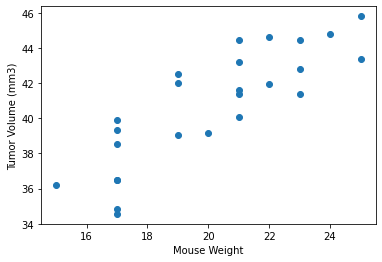

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_mouse_regimen = new_mouse_clean.loc[new_mouse_clean["Drug Regimen"] == "Capomulin",:]

capomulin_mouse_regimen_average = capomulin_mouse_regimen.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_mouse_regimen_average["Weight (g)"],capomulin_mouse_regimen_average["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_mouse_regimen_average
renamed_capomulin_mouse_regimen_average = capomulin_mouse_regimen_average.rename(columns ={"Tumor Volume (mm3)" :"Tumor Volume"})
renamed_capomulin_mouse_regimen_average

,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


In [29]:
Weight = renamed_capomulin_mouse_regimen_average.iloc[:,1]
TumorVolume = renamed_capomulin_mouse_regimen_average.iloc[:,3]
correlation = st.pearsonr(Weight,TumorVolume)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


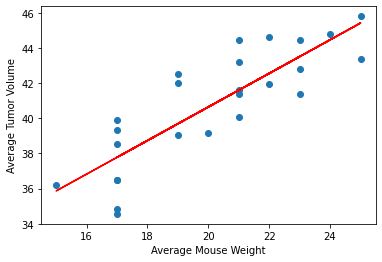

In [30]:
x_values = renamed_capomulin_mouse_regimen_average['Weight (g)']
y_values = renamed_capomulin_mouse_regimen_average['Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Average Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()